In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

891 rows and 12 columns

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId,Survived,Pclass,SibSp,Parch are integers 

Name,Sex,Ticket,Cabin,Embarked are objects

Age,Fare are float

# Identifying the Dependant and Independant Variables

Survived column is dependant variable 

PassengerId,Embarked,Pclass,SibSp,Parch,Name,Sex,Ticket,Cabin,Age,Fare are Independant variables


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and embarked have null values that needs to be filled 

Here 'Passengerid' is an unique column or primary column also 'Name' has no impact in the survival 


Pclass can be an impact let us understand woth other v8irtual8isat8ion methods 


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Classification problem or Regression problem identification 

<AxesSubplot:xlabel='Survived', ylabel='count'>

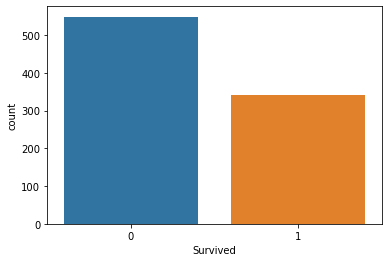

In [7]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.countplot(df['Survived'])

Since the target has only two values this is a Classification problem

This is a class imbalance problem this will be sorted in the solution after removing/converting the columns to graphable dtypes 

Let us encode before validating the details 

Since Name,PassengerId, ticket no,Fare is not contributing to data we need to remove it 

In [8]:
df1=df

In [9]:
df1.drop(['Name','PassengerId','Ticket','Fare'],axis=1,inplace=True)

In [10]:
df1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'],
      dtype='object')

In [11]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

In [12]:
df1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Cabin        object
Embarked     object
dtype: object

# Changing Null Values

Age,cabin  and embarked columns have null values to encode we need to fill these null values 


Changing NUll value for Age column

<AxesSubplot:xlabel='Age', ylabel='Density'>

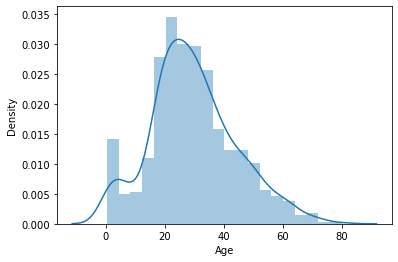

In [13]:
sns.distplot(df1['Age'])


Age column is not normally distributed


Since age column is not normally distributed we must fill with median values 

In [14]:
df1['Age'].fillna(df['Age'].median(),inplace=True)

In [15]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

Null values are removed in Age column 

Filling null values for cabin no 

In [16]:
import random

In [17]:
df1["Cabin"].fillna(lambda x: random.choice(df1[df1[Cabin] != np.nan]["Cabin"]), inplace =True)

In [18]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Cabin       0
Embarked    2
dtype: int64

Since Cabin no is not going to help us in prediction we can drop that column as well 

In [19]:
df1.drop(['Cabin'],axis=1,inplace=True)

In [20]:
df1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

Embarked Nan values filling 

In [21]:

df1['Embarked'].fillna('S', inplace=True)

In [22]:
df1['Embarked'].isnull().sum()

0

In [23]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

There are no Null values now 

In [24]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,28.0,1,2,S
889,1,1,male,26.0,0,0,C


# Converting the Sex column to binary Values

In [25]:
dummy=pd.get_dummies(df1['Sex'])

In [26]:
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [27]:
df2=pd.concat((df1,dummy), axis = 1 )

In [28]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,female,male
0,0,3,male,22.0,1,0,S,0,1
1,1,1,female,38.0,1,0,C,1,0
2,1,3,female,26.0,0,0,S,1,0
3,1,1,female,35.0,1,0,S,1,0
4,0,3,male,35.0,0,0,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,0,1
887,1,1,female,19.0,0,0,S,1,0
888,0,3,female,28.0,1,2,S,1,0
889,1,1,male,26.0,0,0,C,0,1


In [29]:
df2.drop(['Sex','male'], axis = 1)

,Survived,Pclass,Age,SibSp,Parch,Embarked,female
0,0,3,22.0,1,0,S,0
1,1,1,38.0,1,0,C,1
2,1,3,26.0,0,0,S,1
3,1,1,35.0,1,0,S,1
4,0,3,35.0,0,0,S,0
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,S,0
887,1,1,19.0,0,0,S,1
888,0,3,28.0,1,2,S,1
889,1,1,26.0,0,0,C,0


In [30]:
df2.rename(columns={'female':'Sex'})

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Sex,male
0,0,3,male,22.0,1,0,S,0,1
1,1,1,female,38.0,1,0,C,1,0
2,1,3,female,26.0,0,0,S,1,0
3,1,1,female,35.0,1,0,S,1,0
4,0,3,male,35.0,0,0,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,0,1
887,1,1,female,19.0,0,0,S,1,0
888,0,3,female,28.0,1,2,S,1,0
889,1,1,male,26.0,0,0,C,0,1


In [31]:
df3=df2.drop(['Sex','male'], axis = 1)
df3

,Survived,Pclass,Age,SibSp,Parch,Embarked,female
0,0,3,22.0,1,0,S,0
1,1,1,38.0,1,0,C,1
2,1,3,26.0,0,0,S,1
3,1,1,35.0,1,0,S,1
4,0,3,35.0,0,0,S,0
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,S,0
887,1,1,19.0,0,0,S,1
888,0,3,28.0,1,2,S,1
889,1,1,26.0,0,0,C,0


In [32]:
df4=df3.rename(columns={'female':'Sex'},inplace = False)
df4

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex
0,0,3,22.0,1,0,S,0
1,1,1,38.0,1,0,C,1
2,1,3,26.0,0,0,S,1
3,1,1,35.0,1,0,S,1
4,0,3,35.0,0,0,S,0
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,S,0
887,1,1,19.0,0,0,S,1
888,0,3,28.0,1,2,S,1
889,1,1,26.0,0,0,C,0


In [33]:
df4.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Embarked     object
Sex           uint8
dtype: object

<AxesSubplot:xlabel='Sex', ylabel='Density'>

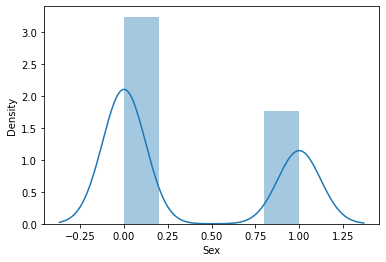

In [34]:
sns.distplot(df4['Sex'])

Sex is not normally distributed

# Solving the class imbalance problem 

In [35]:
df4['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Resampling method

since this is a dataset with a few columns we can achieve class imbalance with over sampling method 

In [36]:
df5=df4
df5

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex
0,0,3,22.0,1,0,S,0
1,1,1,38.0,1,0,C,1
2,1,3,26.0,0,0,S,1
3,1,1,35.0,1,0,S,1
4,0,3,35.0,0,0,S,0
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,S,0
887,1,1,19.0,0,0,S,1
888,0,3,28.0,1,2,S,1
889,1,1,26.0,0,0,C,0


In [37]:
df5['Survived'].isnull().sum()

0

In [38]:
# class count
best_quality_count_0, best_quality_count_1 = df5['Survived'].value_counts()
print('best_quality_count_0, :',best_quality_count_0, '\n best_quality_count_1 : ', best_quality_count_1)

best_quality_count_0, : 549 
 best_quality_count_1 :  342


In [39]:

# Separate class
best_quality_0 = df5[df5['Survived'] == 0]
best_quality_1 = df5[df5['Survived'] == 1]# print the shape of the class
print('best quality 0:', best_quality_0.shape)
print('best quality 1:', best_quality_1.shape)

best quality 0: (549, 7)
best quality 1: (342, 7)


In [40]:
best_quality_1_over = best_quality_1.sample(best_quality_count_0, replace=True)

df6 = pd.concat([best_quality_1_over, best_quality_0], axis=0)

print("total class of 1 and 0: \n",df6['Survived'].value_counts())

total class of 1 and 0: 
 1    549
0    549
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

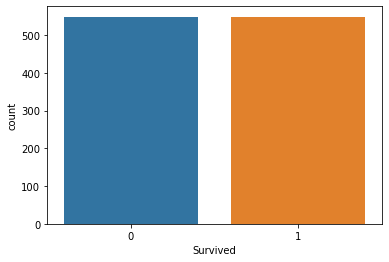

In [41]:
sns.countplot(df6['Survived'])

In [42]:
df6

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex
530,1,2,2.0,1,1,S,1
300,1,3,28.0,0,0,Q,1
248,1,1,37.0,1,1,S,0
445,1,1,4.0,0,2,S,0
700,1,1,18.0,1,0,C,1
...,...,...,...,...,...,...,...
884,0,3,25.0,0,0,S,0
885,0,3,39.0,0,5,Q,1
886,0,2,27.0,0,0,S,0
888,0,3,28.0,1,2,S,1


Class imbalance problem is solved

# EDA 
# Univariate analysis 

In [43]:
df6.shape

(1098, 7)

In [44]:
df5.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Embarked    0
Sex         0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

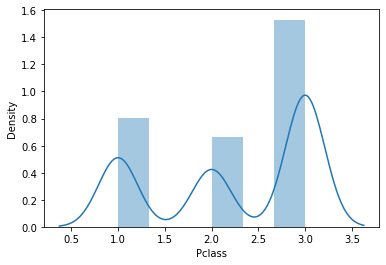

In [45]:
sns.distplot(df6['Pclass'])

Pclass is not normally distributed 

<AxesSubplot:xlabel='Age', ylabel='Density'>

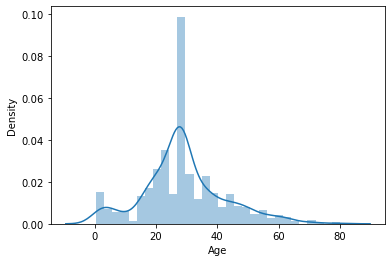

In [46]:
sns.distplot(df6['Age'])

Age column is not normally distributed         

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

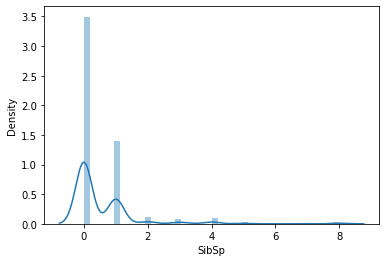

In [47]:
sns.distplot(df6['SibSp'])

SibSp column is not normally distributed          

<AxesSubplot:xlabel='Parch', ylabel='Density'>

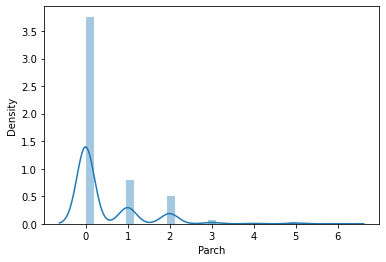

In [48]:
sns.distplot(df6['Parch'])

Parch column is not normally distributed          

Cabin is not normally distributed    

Embarked needs to be Converted to int or float

In [49]:
df6.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Embarked     object
Sex           uint8
dtype: object

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df6.Embarked= le.fit_transform(df6.Embarked.values)

In [51]:
df6.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Embarked      int32
Sex           uint8
dtype: object

Now All the columns are in int or float

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

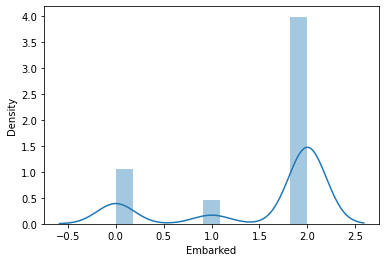

In [53]:
sns.distplot(df6['Embarked'])

Embarked column is not normally distrivuted

# Boxplot for Outliers

<AxesSubplot:xlabel='Survived'>

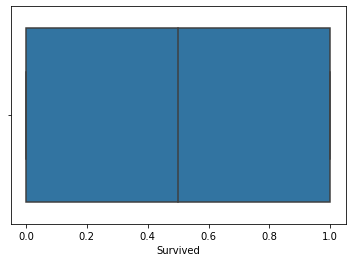

In [54]:
sns.boxplot(df6['Survived'])

<AxesSubplot:xlabel='Pclass'>

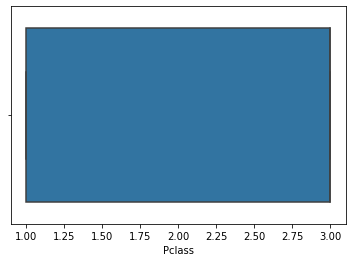

In [55]:
sns.boxplot(df6['Pclass'])

<AxesSubplot:xlabel='Age'>

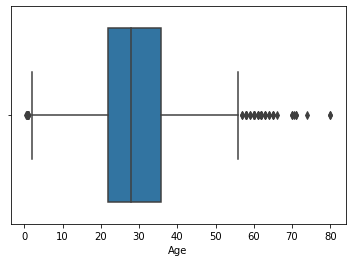

In [56]:
sns.boxplot(df6['Age'])

<AxesSubplot:xlabel='Parch'>

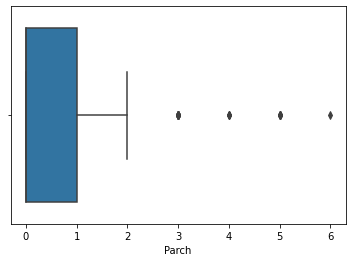

In [57]:
sns.boxplot(df6['Parch'])

<AxesSubplot:xlabel='Sex'>

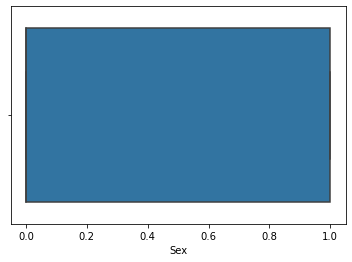

In [58]:
sns.boxplot(df6['Sex'])

<AxesSubplot:xlabel='Embarked'>

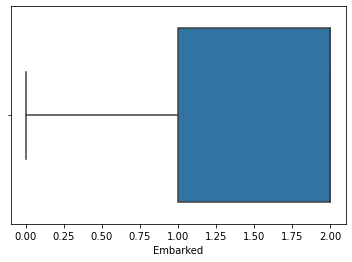

In [59]:
sns.boxplot(df6['Embarked'])

There are no outliers for embarked

Only Parch and Age has outliers that needs to be treated 

Multi collinearity 

In [60]:
cor=df6.corr()

In [61]:
cor

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex
Survived,1.000000,-0.341534,-0.080710,-0.043150,0.123371,-0.135055,0.533333
Pclass,-0.341534,1.000000,-0.296055,0.079524,0.013636,0.117473,-0.157270
Age,-0.080710,-0.296055,1.000000,-0.234319,-0.183452,-0.026650,-0.048244
SibSp,-0.043150,0.079524,-0.234319,1.000000,0.373215,0.074881,0.087563
Parch,0.123371,0.013636,-0.183452,0.373215,1.000000,0.039385,0.230869
Embarked,-0.135055,0.117473,-0.026650,0.074881,0.039385,1.000000,-0.077180
Sex,0.533333,-0.157270,-0.048244,0.087563,0.230869,-0.077180,1.000000


<AxesSubplot:>

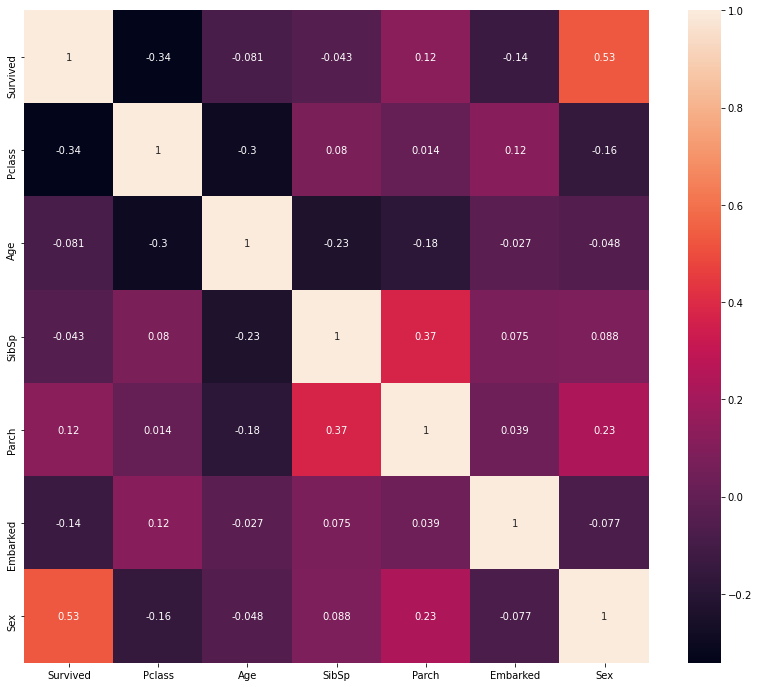

In [62]:
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, ax_size = plt.subplots(figsize=(14,12))
    sns.heatmap(cor,annot=True,ax=ax_size,linecolor='b')

All the values are almost near hence cant remove any of them

# BI Variate analysis

<AxesSubplot:title={'center':'Comparison between Pclass and age '}, xlabel='Pclass', ylabel='Age'>

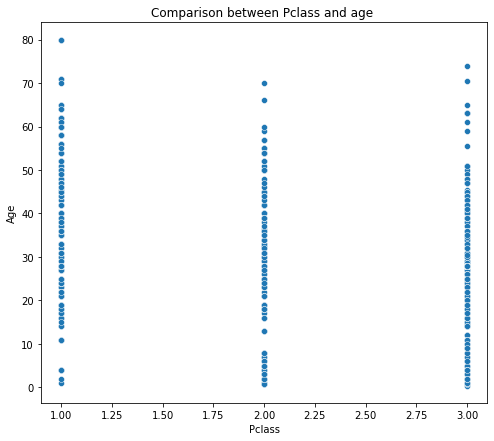

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,7])
plt.title('Comparison between Pclass and age ')
sns.scatterplot(df6['Pclass'],df6['Age'])

In [65]:
df6.describe()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,0.500000,2.242259,28.951658,0.509107,0.433515,1.533698,0.409836
std,0.500228,0.848377,13.344828,1.034681,0.841953,0.796101,0.492027
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,1.000000,0.000000
50%,0.500000,3.000000,28.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,3.000000,35.750000,1.000000,1.000000,2.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,2.000000,1.000000


<AxesSubplot:title={'center':'Comparison between Parch and Sibsp '}, xlabel='Parch', ylabel='SibSp'>

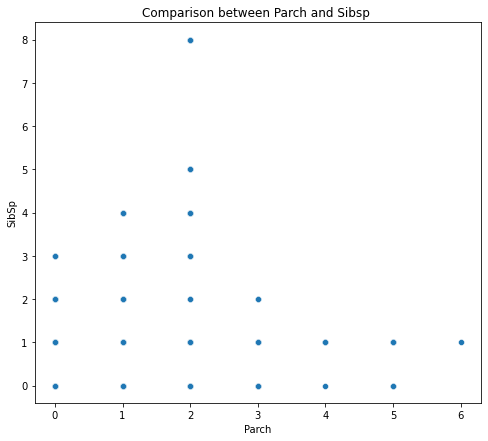

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,7])
plt.title('Comparison between Parch and Sibsp ')
sns.scatterplot(df6['Parch'],df6['SibSp'])

No major overlapping and they are not much interrelated so cant consider for removal of any of these columns

# Removing Outliers

In [67]:
from scipy.stats import zscore

z=np.abs(zscore(df6))

new_df=df6[(z<3).all(axis=1)]

In [68]:
df6.shape

(1098, 7)

In [69]:
new_df.shape

(1032, 7)

1098-1040/1098 = 4.75%

THis is less than 8% so can consider the new_df

# Variance Inflation Factor to find multi collinearity

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
vif_data = pd.DataFrame()
vif_data["feature"] = new_df.columns

In [72]:
    vif_data["VIF"] = [variance_inflation_factor(new_df.values, i)
                              for i in range(len(new_df.columns))]
    print(vif_data)

    feature       VIF
0  Survived  2.780676
1    Pclass  4.374606
2       Age  3.914840
3     SibSp  1.473112
4     Parch  1.485775
5  Embarked  4.235647
6       Sex  2.456584


there is no data more than 12 so we can have all these columns 

# Removing skewness

In [73]:
new_df.skew()

Survived   -0.042707
Pclass     -0.420063
Age         0.326707
SibSp       1.936273
Parch       1.792528
Embarked   -1.222775
Sex         0.391554
dtype: float64

# Defining Dependant and independent variable


In [74]:
x=new_df.drop('Survived',axis=1)
y=new_df['Survived']

In [75]:
x

,Pclass,Age,SibSp,Parch,Embarked,Sex
530,2,2.0,1,1,2,1
300,3,28.0,0,0,1,1
248,1,37.0,1,1,2,0
445,1,4.0,0,2,2,0
700,1,18.0,1,0,0,1
...,...,...,...,...,...,...
883,2,28.0,0,0,2,0
884,3,25.0,0,0,2,0
886,2,27.0,0,0,2,0
888,3,28.0,1,2,2,1


In [76]:
y

530    1
300    1
248    1
445    1
700    1
      ..
883    0
884    0
886    0
888    0
890    0
Name: Survived, Length: 1032, dtype: int64

# Scaling - Random state

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [78]:
maxAccu=0
maxRs=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ", maxAccu, "On random_state", maxRS)

Best Accuracy is  0.8870967741935484 On random_state 551


In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=551)

# MinMax scaler

In [80]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)

[[0.         0.42055505 0.         0.         1.         0.        ]
 [1.         0.26806953 0.         0.         1.         0.        ]
 [1.         0.29856664 0.         0.         1.         0.        ]
 ...
 [1.         0.16132967 0.         0.         0.         0.        ]
 [1.         0.52729491 0.         0.         1.         0.        ]
 [1.         0.29856664 0.         0.         0.         0.        ]]


In [81]:
    
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report 

# Decision Tree Classifier

In [82]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       160
           1       0.88      0.89      0.88       150

    accuracy                           0.89       310
   macro avg       0.89      0.89      0.89       310
weighted avg       0.89      0.89      0.89       310



# RandomForestClassifier

In [83]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       160
           1       0.86      0.92      0.89       150

    accuracy                           0.89       310
   macro avg       0.89      0.89      0.89       310
weighted avg       0.89      0.89      0.89       310



In [84]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [85]:
y_pred= classifier.predict(x_test)  

# Support Vector Classifier

In [86]:
SV=SVC()
SV.fit(x_train,y_train)
pred=SV.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.65      0.93      0.76       160
           1       0.86      0.47      0.61       150

    accuracy                           0.71       310
   macro avg       0.75      0.70      0.69       310
weighted avg       0.75      0.71      0.69       310



# GradientBoostingClassifier

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=1)
GBC.fit(x_train, y_train)
GBCpred = GBC.predict(x_test)
gbc=classification_report(y_test,GBCpred)
print(gbc)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       160
           1       0.84      0.83      0.84       150

    accuracy                           0.85       310
   macro avg       0.85      0.84      0.84       310
weighted avg       0.85      0.85      0.85       310



# Cross Validation Score Calculation

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.832357769335397


In [90]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8391538858402514


In [91]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.7180151024811219


In [92]:
print(cross_val_score(GBC,x,y,cv=5).mean())

0.8275080906148867


Difference between Model Accuracy and Cross Validation score

DTC= 89-83.2 = 5.1

RFC= 89-83.9 = 5.7

SV= 71-71.8 = -0.8

GBC= 85-82.75 = 1.1

Support Vector Classifier has least difference


# Hyper Parameter Tuning

In [93]:
from sklearn.model_selection import GridSearchCV

In [98]:
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.604 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.590 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.590 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.681 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.517 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.764 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.764 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.828 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.792 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.786 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.862 total time=   0.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.722 total time=   0.3s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.792 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.708 total time=   0.2s
[CV 1/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [99]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [100]:
grid_predictions = grid.predict(x_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       160
           1       0.84      0.80      0.82       150

    accuracy                           0.83       310
   macro avg       0.83      0.83      0.83       310
weighted avg       0.83      0.83      0.83       310



We have got almost 83 % prediction result.

Applying Hyper paramter tuning to DTC as well

In [105]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [108]:
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [112]:
def display(results):
    print('Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [113]:
display(cv)

Best parameters are: {results.best_params_}


0.522 + or -0.002 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.762 + or -0.051 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.777 + or -0.054 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.792 + or -0.049 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.526 + or -0.004 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.773 + or -0.06 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.785 + or -0.065 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.785 + or -0.066 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.594 + or -0.032 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.784 + or -0.063 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.788 + or -0.056 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.803 +

'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

In [114]:
preds = DTC.predict(x_test)
print(preds[:30])
print(y_test[:30].values)

[1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1]
[1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1]


Since the Prediction of DTC is giving High accuracy we are considering only DTC model 


Predicted and true values are same First row is predicted value second row is actual value

# Final Model Creation

In [116]:
Final_mod = DecisionTreeClassifier(criterion='gini', max_depth= 9, max_features='log2',splitter='best')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

83.22580645161291


# Saving the model

In [118]:
import joblib
joblib.dump(Final_mod,"Titanicproject_FinalModel.pkl")

['Titanicproject_FinalModel.pkl']